# Resampling, Shifting, and Windowing

Ref: VanderPlas, Jacob T - Python data science handbook_ essential tools for working with data-O'Reilly Media (2017)

In [1]:
pip install pandas-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/109.5 KB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 3.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/4.5 MB ? eta -:--:--

     ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.2/4.5 MB 4.5 MB/s eta 0:00:01

     ━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.4/4.5 MB 5.0 MB/s eta 0:00:01

     ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.9/4.5 MB 5.9 MB/s eta 0:00:01

     ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/4.5 MB 5.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/4.5 MB 5.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━ 2.1/4.5 MB 6.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 2.2/4.5 MB 6.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━ 2.5/4.5 MB 6.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━ 2.8/4.5 MB 6.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 3.7/4.5 MB 7.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━ 4.1/4.5 MB 7.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━ 4.4/4.5 MB 6.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 4.5/4.5 MB 6.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 6.2 MB/s eta 0:00:00


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


In [2]:
from pandas_datareader import data

In [3]:
# https://github.com/jakevdp/PythonDataScienceHandbook/issues/94

import pandas_datareader.data as web
from datetime import datetime

goog = data.DataReader('F', start='2004', end='2016',data_source='yahoo')

goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-31,16.059999,15.890000,15.990000,16.000000,7702900.0,9.653556
2004-01-02,16.150000,16.030001,16.100000,16.080000,9030400.0,9.701822
2004-01-05,16.650000,16.330000,16.370001,16.590000,20069800.0,10.009532
2004-01-06,16.730000,16.389999,16.719999,16.540001,16760800.0,9.979365
2004-01-07,17.020000,16.450001,16.580000,16.990000,13801900.0,10.250871


In [4]:
goog = goog['Close']

In [5]:
goog

Date
2003-12-31    16.000000
2004-01-02    16.080000
2004-01-05    16.590000
2004-01-06    16.540001
2004-01-07    16.990000
                ...    
2015-12-24    14.310000
2015-12-28    14.180000
2015-12-29    14.230000
2015-12-30    14.170000
2015-12-31    14.090000
Name: Close, Length: 3022, dtype: float64

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

ModuleNotFoundError: No module named 'seaborn'

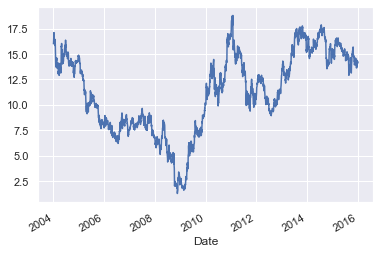

In [16]:
goog.plot();

In [27]:
print(goog.head(5))
print(goog.shift(1).fillna(0).head(3))

Date
2003-12-31    16.000000
2004-01-02    16.080000
2004-01-05    16.590000
2004-01-06    16.540001
2004-01-07    16.990000
Name: Close, dtype: float64
Date
2003-12-31     0.00
2004-01-02    16.00
2004-01-05    16.08
Name: Close, dtype: float64


In [23]:
rolling = goog.rolling(5, center=True)

In [26]:
rolling.mean().head()

Date
2003-12-31       NaN
2004-01-02       NaN
2004-01-05    16.440
2004-01-06    16.660
2004-01-07    16.756
Name: Close, dtype: float64

16.756000137329103

In [2]:
for i in range(5):
    print(i)

0
1
2
3
4
